In [3]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings


In [ ]:
data_totl = pd.read_csv(r"Results\final_Data_results\Houses_and_Apartments_combined_without_outliers.csv")

In [16]:

# Filter the DataFrame for a specific region
df_brussels = data_totl[data_totl['Region'] == 'Brussels']
df_flanders = data_totl[data_totl['Region'] == 'Flanders']
df_Wallonie =data_totl[data_totl['Region'] == 'Wallonie']

Number of observation data before removing the outliers in Brussels is 1891
Number of observation data before removing the outliers in Flanders is 1768
Number of observation data before removing the outliers in Wallonia is 390


In [5]:
# Dictionary to map kitchen types to numerical values
kitchen_type_assig = {
    "NOT_INSTALLED": 0,
    "USA_UNINSTALLED": 0,
    "SEMI_EQUIPPED": 1,
    "USA_SEMI_EQUIPPED": 2,
    "INSTALLED": 3,
    "USA_INSTALLED": 4,
    "HYPER_EQUIPPED": 5,
    "USA_HYPER_EQUIPPED": 6
}

# Dictionary to map building conditions to numerical values
building_con = {
    "TO_RESTORE": 0,
    "TO_RENOVATE": 0,
    "TO_BE_DONE_UP": 1,
    "GOOD": 3,
    "JUST_RENOVATED": 4,
    "AS_NEW": 5
}

# Applying the mapping to the columns in the dataframe
data_totl['KitchenType_Q'] = data_totl['KitchenType'].replace(kitchen_type_assig)
data_totl['building_cond_Q'] = data_totl['StateBuilding'].replace(building_con)


C:\Users\mgabi\AppData\Local\Temp\ipykernel_32588\1440957261.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_totl['KitchenType_Q'] = data_totl['KitchenType'].replace(kitchen_type_assig)
C:\Users\mgabi\AppData\Local\Temp\ipykernel_32588\1440957261.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_totl['building_cond_Q'] = data_totl['StateBuilding'].replace(building_con)


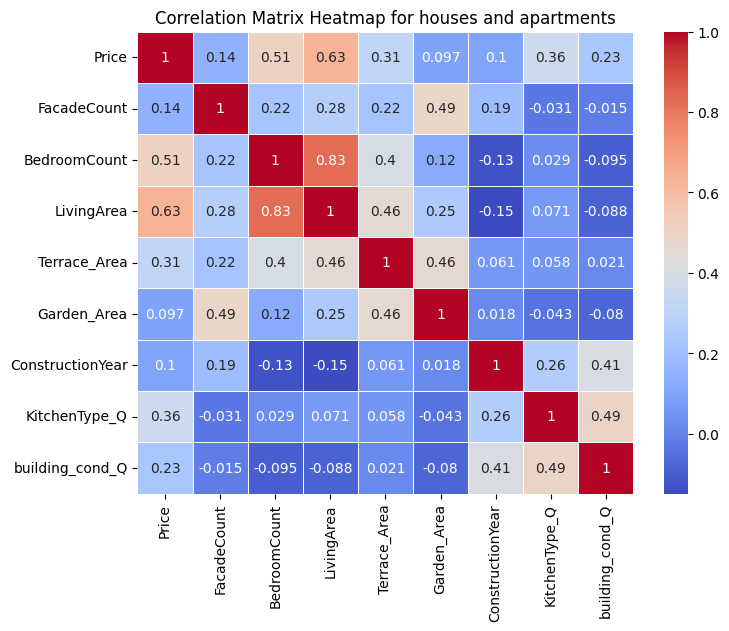

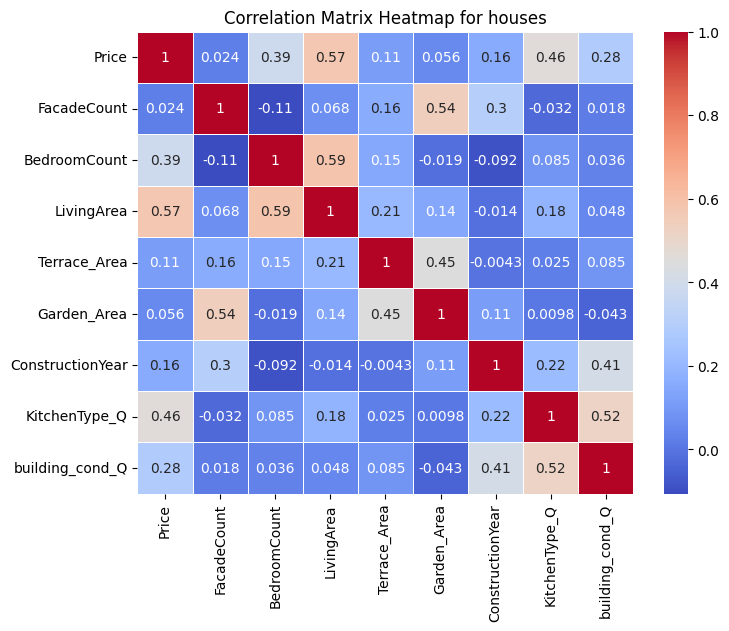

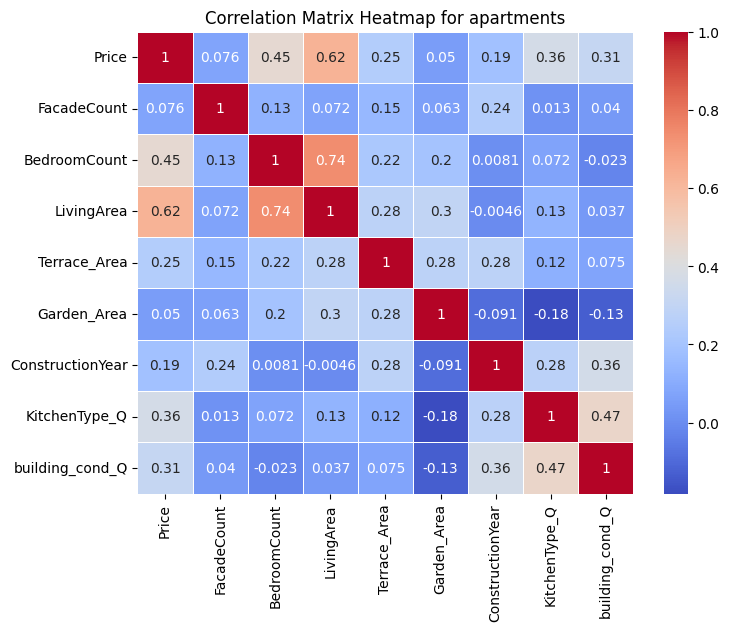

In [9]:
##################### correlation analysis #########################

def heat_map(data,title):
    selected_parameters = data[['Price', 'FacadeCount', 'BedroomCount', 'LivingArea','Terrace_Area','Garden_Area','ConstructionYear','KitchenType_Q','building_cond_Q']]
    correlation_matrix = selected_parameters.corr(method='spearman')
    plt.figure(figsize=(8,6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

###################   All data #################################
heat_map(data=data_totl,title = "Correlation Matrix Heatmap for houses and apartments")
data_Houses = data_totl[data_totl['PropertySubtype']== 'HOUSE']
heat_map(data=data_Houses,title = "Correlation Matrix Heatmap for houses")
data_Apartments = data_totl[data_totl['PropertySubtype']== 'APARTMENT']
heat_map(data=data_Apartments,title = "Correlation Matrix Heatmap for apartments")

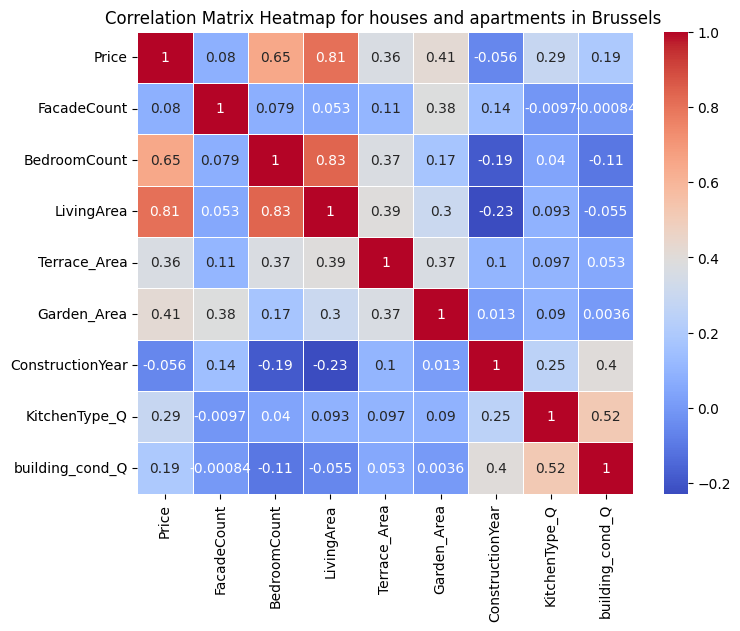

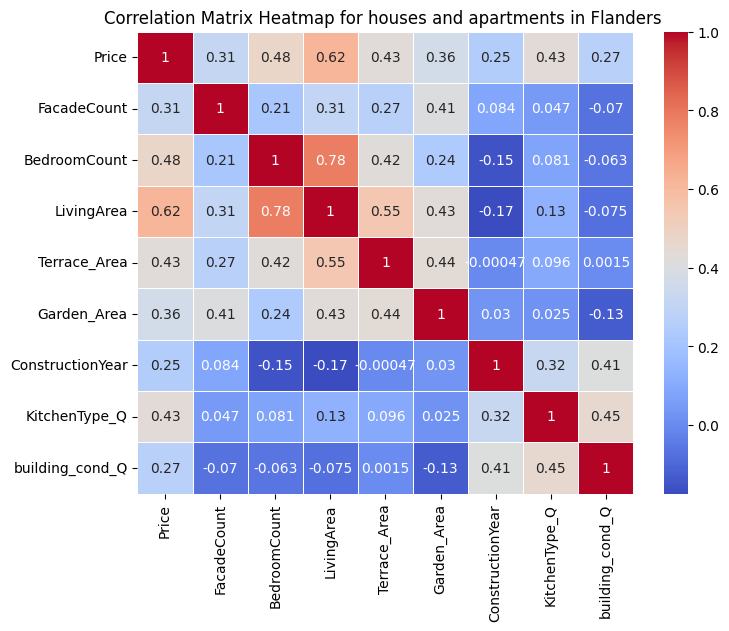

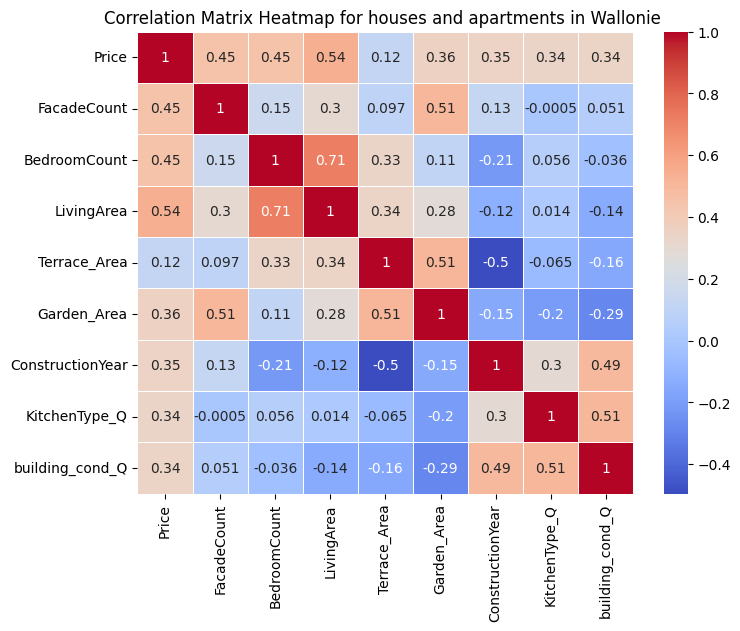

In [11]:
############################ per region ##############################
df_brussels = data_totl[data_totl['Region'] == 'Brussels']
df_flanders = data_totl[data_totl['Region'] == 'Flanders']
df_Wallonie =data_totl[data_totl['Region'] == 'Wallonie']
heat_map(data=df_brussels,title = "Correlation Matrix Heatmap for houses and apartments in Brussels ")
heat_map(data=df_flanders,title = "Correlation Matrix Heatmap for houses and apartments in Flanders ")
heat_map(data=df_Wallonie,title = "Correlation Matrix Heatmap for houses and apartments in Wallonie ")